In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hajia\Downloads\Mini-Projects - Sheet1.csv")

In [2]:
df1 = df['Project name'].to_frame()
df1

,Project name
0,Detecting fake business pages on social media
1,Predicting Admission Acceptance and Rejection ...
2,Multi-Disease Prediction Techniques Using Mach...
3,Predicting influx of tourism using Tourism dat...
4,Fraud detection in e-commerce
5,Cyberbulling in live chatting detection using ...
6,Cyberbullying Detection on social media using ...
7,Data analysis and predicting when to send mail...
8,VOLUME CONTROL USING HAND GESTURES (open cv an...
9,Analysing Customers Personality for Business I...


In [3]:
df1.dropna(inplace= True)
df1

,Project name
0,Detecting fake business pages on social media
1,Predicting Admission Acceptance and Rejection ...
2,Multi-Disease Prediction Techniques Using Mach...
3,Predicting influx of tourism using Tourism dat...
4,Fraud detection in e-commerce
5,Cyberbulling in live chatting detection using ...
6,Cyberbullying Detection on social media using ...
7,Data analysis and predicting when to send mail...
8,VOLUME CONTROL USING HAND GESTURES (open cv an...
9,Analysing Customers Personality for Business I...


In [4]:
import numpy
print("NumPy:", numpy.__version__)

import torch
print("Torch:", torch.__version__)


NumPy: 1.26.4
Torch: 2.1.2+cpu


In [5]:
from sentence_transformers import SentenceTransformer
print("Model loading...")
model = SentenceTransformer("all-MiniLM-L6-v2")
print("Success")


d:\mini projects classification\.venv311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model loading...


d:\mini projects classification\.venv311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hajia\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
d:\mini projects classification\.venv311\Lib\site-packages\huggingface_hub\file_download.

Success


In [8]:
embeddings = model.encode(df1["Project name"].tolist())

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [12]:
df1["Cluster"] = kmeans.fit_predict(embeddings)

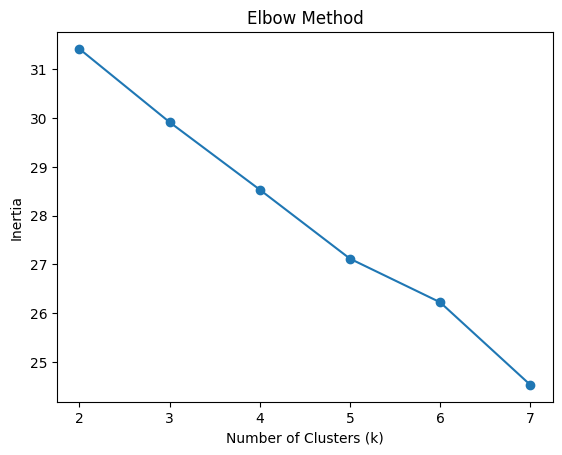

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [19]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    print(f"k={k}, Silhouette Score={score:.4f}")


k=2, Silhouette Score=0.0444
k=3, Silhouette Score=0.0360
k=4, Silhouette Score=0.0396
k=5, Silhouette Score=0.0397
k=6, Silhouette Score=0.0340
k=7, Silhouette Score=0.0520


In [20]:
df1['Project name']

0        Detecting fake business pages on social media 
1     Predicting Admission Acceptance and Rejection ...
2     Multi-Disease Prediction Techniques Using Mach...
3     Predicting influx of tourism using Tourism dat...
4                         Fraud detection in e-commerce
5     Cyberbulling in live chatting detection using ...
6     Cyberbullying Detection on social media using ...
7     Data analysis and predicting when to send mail...
8     VOLUME CONTROL USING HAND GESTURES (open cv an...
9     Analysing Customers Personality for Business I...
10              Fake JOb Recruitment Detection using ML
11           AI-powered mental health assistant/chatbot
12     College recommendations system to help studen...
13    Unsupervised ML for Managing Railway Station S...
14                             Drug Response Prediction
15    Analysis of Women Safety in indian cities usin...
16                Inventory demand forecasting using ML
17    CICIDS 2017 dataset feature analysis with 

In [22]:
import pandas as pd

# Try Windows-1252 (common for Excel-exported CSVs on Windows)
df3 = pd.read_csv(r"C:\Users\hajia\Downloads\Mini-Projects - Sheet1.csv", encoding="cp1252")

# Alternatively, ISO-8859-1 also works for many files
# df3 = pd.read_csv(r"C:\Users\hajia\Downloads\Mini-Projects - Sheet1.csv", encoding="latin1")

In [24]:
df3.columns

Index(['Project Title', 'Deep Learning', 'NLP', 'Medical/Health',
       'Finance/Fraud', 'Vision', 'Real-Time', 'Unsupervised', 'Time-Series',
       'Low Data', 'Noisy Data', 'Justification'],
      dtype='str')

In [26]:
df3['Combined_Text'] = df3['Project Title'] + " " + df3['Justification']



In [28]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = model.encode(
    df3["Combined_Text"].tolist(),
    normalize_embeddings=True
)


d:\mini projects classification\.venv311\Lib\site-packages\huggingface_hub\file_download.py:949: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    print(f"k={k}, silhouette={score:.4f}")


k=2, silhouette=0.0542
k=3, silhouette=0.0503
k=4, silhouette=0.0603
k=5, silhouette=0.0648
k=6, silhouette=0.0756


In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

embeddings_norm = embeddings

for k in range(2, 8):
    model = AgglomerativeClustering(
        n_clusters=k,
        metric='cosine',
        linkage='average'
    )
    labels = model.fit_predict(embeddings_norm)
    score = silhouette_score(embeddings_norm, labels, metric='cosine')
    print(f"k={k}, silhouette={score:.4f}")


k=2, silhouette=0.1302
k=3, silhouette=0.0691
k=4, silhouette=0.0807
k=5, silhouette=0.0939
k=6, silhouette=0.1303
k=7, silhouette=0.1186


In [40]:
model = AgglomerativeClustering(
    n_clusters=6,
    metric='cosine',
    linkage='average'
)

df3["Semantic_Cluster"] = model.fit_predict(embeddings_norm)


In [44]:
for i in range(6):
    print(f"\nCluster {i}:")
    print(df3[df3["Semantic_Cluster"] == i]["Project Title"].values)



Cluster 0:
<StringArray>
[             '4. Predicting influx of tourism using tourism data analysis',
 '8. Data analysis & predicting when to send mails for effective marketing',
   '10. Analysing customers’ personality for business improvement using ML',
        '14. Unsupervised ML for managing railway station safety accidents',
                                '17. Inventory demand forecasting using ML',
                   '18. CICIDS 2017 feature analysis for anomaly detection',
                      '20. Financial news sentiment & stock trend analyzer',
                         '22. Datapulse: prediction of stock market trends',
                                       '34. Smartphone addiction detection',
                            '38. Indian agriculture trending crop analysis']
Length: 10, dtype: str

Cluster 1:
<StringArray>
[          '3. Multi-disease prediction techniques using ML',
                              '15. Drug Response Prediction',
                               

In [52]:
cluster_summary = df3.groupby("Semantic_Cluster")[
    ["Deep Learning","NLP","Medical/Health","Finance/Fraud",
     "Vision","Real-Time","Unsupervised","Time-Series",
     "Low Data","Noisy Data"]
].mean()

print(cluster_summary)


                  Deep Learning       NLP  Medical/Health  Finance/Fraud  \
Semantic_Cluster                                                           
0                      0.200000  0.200000        0.100000       0.200000   
1                      0.666667  0.000000        0.833333       0.000000   
2                      0.666667  0.833333        0.250000       0.166667   
3                      1.000000  0.000000        0.000000       0.000000   
4                      0.000000  0.000000        0.000000       0.000000   
5                      0.000000  0.000000        0.000000       0.000000   

                    Vision  Real-Time  Unsupervised  Time-Series  Low Data  \
Semantic_Cluster                                                             
0                 0.000000   0.000000      0.400000          0.5  0.400000   
1                 0.416667   0.083333      0.000000          0.0  0.916667   
2                 0.000000   0.583333      0.166667          0.0  0.250000   
3

In [54]:
df3["Complexity_Score"] = df3[[
"Deep Learning","NLP","Medical/Health","Finance/Fraud",
"Vision","Real-Time","Unsupervised","Time-Series",
"Low Data","Noisy Data"
]].sum(axis=1)

cluster_complexity = df3.groupby("Semantic_Cluster")["Complexity_Score"].mean()

print(cluster_complexity.sort_values())


Semantic_Cluster
5    0.000000
4    1.000000
0    2.000000
1    2.916667
2    3.500000
3    4.000000
Name: Complexity_Score, dtype: float64


In [55]:
clustercomplexity = df3.groupby("Semantic_Cluster")["Complexity_Score"].mean()
print(cluster_complexity.sort_values())


Semantic_Cluster
5    0.000000
4    1.000000
0    2.000000
1    2.916667
2    3.500000
3    4.000000
Name: Complexity_Score, dtype: float64


In [56]:
weights = {
    "Deep Learning": 3,
    "Medical/Health": 3,
    "Real-Time": 2,
    "Vision": 2,
    "Finance/Fraud": 2,
    "Time-Series": 2,
    "Low Data": 2,
    "NLP": 1.5,
    "Unsupervised": 1.5,
    "Noisy Data": 1
}

df3["Weighted_Score"] = sum(
    df3[col] * weight for col, weight in weights.items()
)


In [57]:
cluster_weighted = df3.groupby("Semantic_Cluster")["Weighted_Score"].mean()

print(cluster_weighted.sort_values())


Semantic_Cluster
5    0.000000
4    1.833333
0    4.000000
2    6.833333
1    7.333333
3    9.000000
Name: Weighted_Score, dtype: float64


In [58]:
easy_clusters = [5,4]
avg_clusters = [0]
hard_clusters = [2,1,3]

def final_label(cluster):
    if cluster in easy_clusters:
        return "Easy"
    elif cluster in avg_clusters:
        return "Average"
    else:
        return "Difficult"

df3["Final_Difficulty"] = df3["Semantic_Cluster"].apply(final_label)


In [59]:
df3

,Project Title,Deep Learning,NLP,Medical/Health,Finance/Fraud,Vision,Real-Time,Unsupervised,Time-Series,Low Data,Noisy Data,Justification,Combined_Text,MP_Difficult_Flag,Complexity_Score,MP_Difficulty,Semantic_Cluster,Weighted_Score,Final_Difficulty
0,1. Detecting fake business pages on social media,0,1,0,0,0,0,0,0,1,0,This involves ML classification of social medi...,1. Detecting fake business pages on social med...,0,2,Average,2,3.5,Difficult
1,2. Predicting admission acceptance/rejection o...,0,0,0,0,0,0,0,0,1,0,A supervised ML model (e.g. KNN) on student pr...,2. Predicting admission acceptance/rejection o...,0,1,Easy,4,2.0,Easy
2,3. Multi-disease prediction techniques using ML,1,0,1,0,0,0,0,0,1,0,A healthcare application predicting multiple d...,3. Multi-disease prediction techniques using M...,1,3,Difficult,1,8.0,Difficult
3,4. Predicting influx of tourism using tourism ...,0,0,0,0,0,0,0,1,0,0,This is a tourism demand forecasting task (tim...,4. Predicting influx of tourism using tourism ...,0,1,Easy,0,2.0,Average
4,5. Fraud detection in e-commerce,1,0,0,1,0,1,1,0,0,0,E-commerce fraud detection is a financial/secu...,5. Fraud detection in e-commerce E-commerce fr...,1,4,Difficult,2,8.5,Difficult
5,6. Cyberbullying in live chatting detection us...,1,1,0,0,0,1,0,0,0,1,Detecting cyberbullying in live chat uses NLP ...,6. Cyberbullying in live chatting detection us...,1,4,Difficult,2,7.5,Difficult
6,7. Cyberbullying detection on social media usi...,1,1,0,0,0,1,0,0,0,1,"Similar to #6, this uses NLP (text) and ML/DL ...",7. Cyberbullying detection on social media usi...,1,4,Difficult,2,7.5,Difficult
7,8. Data analysis & predicting when to send mai...,0,0,0,0,0,0,0,0,1,0,This is a marketing analytics task using past ...,8. Data analysis & predicting when to send mai...,0,1,Easy,0,2.0,Average
8,9. Volume control using hand gestures (OpenCV ...,1,0,0,0,1,1,0,0,1,0,A computer vision system for hand-gesture cont...,9. Volume control using hand gestures (OpenCV ...,1,4,Difficult,3,9.0,Difficult
9,10. Analysing customers’ personality for busin...,1,1,0,0,0,0,0,0,1,0,Likely uses behavioral or textual data to infe...,10. Analysing customers’ personality for busin...,1,3,Average,0,6.5,Average


In [32]:
X_struct = df3[['Deep Learning', 'NLP', 'Medical/Health',
       'Finance/Fraud', 'Vision', 'Real-Time', 'Unsupervised', 'Time-Series',
       'Low Data', 'Noisy Data']].values

In [80]:
q1 = df3["Weighted_Score"].quantile(0.33)
q2 = df3["Weighted_Score"].quantile(0.66)

def mp_multiclass(score):
    if score <= q1:
        return 0
    elif score <= q2:
        return 1
    else:
        return 2

df3["MP_Difficulty"] = df3["Weighted_Score"].apply(mp_multiclass)


In [81]:
df3.columns

Index(['Project Title', 'Deep Learning', 'NLP', 'Medical/Health',
       'Finance/Fraud', 'Vision', 'Real-Time', 'Unsupervised', 'Time-Series',
       'Low Data', 'Noisy Data', 'Justification', 'Combined_Text',
       'MP_Difficult_Flag', 'Complexity_Score', 'MP_Difficulty',
       'Semantic_Cluster', 'Weighted_Score', 'Final_Difficulty', 'MP_num',
       'Semantic_num', 'Ensemble_num', 'Final_Output', 'Ensemble_score'],
      dtype='str')

In [88]:
label_map = {
    "Easy": 0,
    "Average": 1,
    "Difficult": 2
}

df3["MP_num"] = df3['MP_Difficulty'].astype('int')
df3["Semantic_num"] = df3["Final_Difficulty"].map(label_map)


In [90]:
df3["Ensemble_score"] = (
    0.6 * df3["MP_num"] +
    0.4 * df3["Semantic_num"]
)


In [91]:
df3["Final_num"] = df3["Ensemble_score"].round().astype(int)

In [92]:
reverse_map = {0:"Easy", 1:"Average", 2:"Difficult"}

df3["Final_Output"] = df3["Final_num"].map(reverse_map)


In [94]:
df3[["MP_Difficulty","MP_num","Semantic_num","Final_Output"]].head()


,MP_Difficulty,MP_num,Semantic_num,Final_Output
0,0,0,2,Average
1,0,0,0,Easy
2,2,2,2,Difficult
3,0,0,1,Easy
4,2,2,2,Difficult
